### Challenge: The boston marathon
You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the [Boston Marathon](https://github.com/llimllib/bostonmarathon). Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [2]:
sns.set_style('white')

In [3]:
direc = r'../../../bostonmarathon/results/2013/results.csv'
raw = pd.read_csv(direc)

In [4]:
results_df = raw.copy(deep=True)

In [5]:
results_df.head(5)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [6]:
results_df.dtypes

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [7]:
results_df.dropna(axis=0, inplace=True)

In [8]:
# get rid of nonumeric
set_list = ["5k", "10k", "25k", "30k", "35k", "half", "40k"]

for set in set_list:
    results_df.drop(results_df[results_df[set] == "-"].index, inplace=True) 

for set in set_list:
    results_df[set] = pd.to_numeric(results_df[set])

In [9]:
X = results_df[results_df.columns[results_df.dtypes != 'object']]

In [10]:
results_df = pd.concat([X, pd.get_dummies(results_df[["gender"]], drop_first=True)], axis=1)

In [11]:
X = normalize(X)

In [12]:
X.shape

(575, 13)

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Meanshift

In [14]:
bandw_estimate = estimate_bandwidth(results_df, quantile=.2, n_samples=500)

In [15]:
ms = MeanShift(bandwidth=bandw_estimate, bin_seeding=True)
ms.fit(X)

labels = ms.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
print("there are {} clusters".format(n_clusters_))

there are 1 clusters


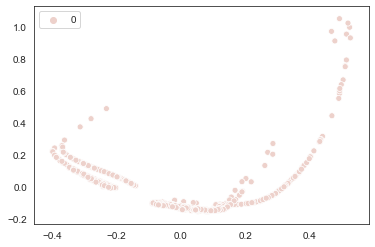

In [16]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels);

## Affinity Propagation

In [17]:
af = AffinityPropagation(damping=.9).fit(X)

aflabels = af.labels_
indices = af.cluster_centers_indices_
n_clusters_ = len(indices)
print('Number of Affinity Propagation clusters: {}'.format(n_clusters_))


Number of Affinity Propagation clusters: 17


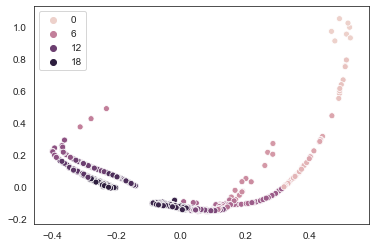

In [18]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=aflabels);

## Spectral Clustering

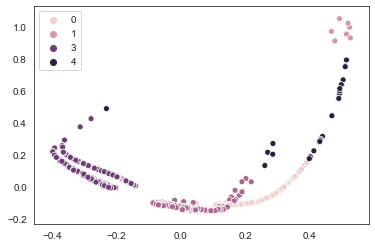

In [19]:
n_clusters = 5
spectral = SpectralClustering(n_clusters).fit(X)
speclabels = spectral.labels_
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=speclabels);

In [20]:
X1, X2, = train_test_split(X, test_size = .5)
X11, X12, = train_test_split(X1, test_size = .5)
X13, X14, = train_test_split(X2, test_size = .5)

In [21]:
for subset in [X11, X12, X13, X14]:
    model = spectral.fit(subset)
    labels = model.labels_
    print(silhouette_score(subset, labels, metric='euclidean'))

0.6138746000910266
0.3624452156080047
0.5992165135045187
0.5705732140987563
